In [44]:
import numpy as np
from matplotlib import pyplot as plt
from enum import Enum
%matplotlib inline

class InitMode(Enum):
    RANDOM = 0
    FURTHEST_FROM_ALL = 1
    


def kmeans(points: np.array, n_clusters: int, mode=InitMode.RANDOM, ret_init=False, ret_centers=False):
    if len(points) < n_clusters:  #  impossible situation
        return None
    
    dim = points.shape[1]  # each point is n-dimensional vector
    centers = None
    
    if mode == InitMode.RANDOM:
        max_r = np.max((np.sum(points**2, axis=1))**0.5)  #  radius of the circle that contains all the points
        centers = np.random.rand(n_clusters, dim) * max_r * 2 - max_r
    elif mode == InitMode.FURTHEST_FROM_ALL:
        first_p_n = np.random.choice(points.shape[0])  # choose random point as the first
        centers = points[first_p_n, np.newaxis]
        new_points = np.delete(points, first_p_n, axis=0)
        while len(centers) < n_clusters:
            dist = np.sum((new_points[:, np.newaxis] - centers)**2, axis=2)  # distances**2 between every point and every cluster center
            furthest_p_n = np.argmax(np.sum(dist**0.5, axis=1))
            furthest_point = new_points[furthest_p_n]  # furthest point from all of the centers
            centers = np.vstack((centers, furthest_point))
            new_points = np.delete(new_points, furthest_p_n, axis=0)
            
    init_centers = centers.copy()
    # return centers
    clusters = None
    unchanged = 0
    while not unchanged:
        
        dist = np.sum((points[:, np.newaxis] - centers)**2, axis=2)  # distances**2 between every point and every cluster center
        
        init_cl = np.argmin(dist, axis=0)  # closest points to every cluster center
        clusters = points[init_cl, np.newaxis]
        clusters = [clusters[i] for i in range(n_clusters)]  # want the ability to have different number of points in each cluster
        
        rem_points = np.delete(points, init_cl, axis=0)  # remainig points after initializing clusters
        
        if len(rem_points) > 0:
            dist = np.sum((rem_points[:, np.newaxis] - centers)**2, axis=2)  # the same dist for the remainig points
            closest_cl = np.argmin(dist, axis=1) # closest cluster to each point  
            for i in range(len(rem_points)):
                clusters[closest_cl[i]] = np.vstack((clusters[closest_cl[i]], rem_points[i, np.newaxis]))  #  adding points to the closest cluster
            
        centers_prev = centers.copy()
        centers = np.array([np.sum(clusters[i], axis=0) / len(clusters[i]) for i in range(n_clusters)])  #  calculating new centers as the center of mass of each cluster
        unchanged = np.array_equal(centers, centers_prev)
    res = [clusters]
    if ret_init:
        res += [init_centers]
    if ret_centers:
        res += [centers]
        
    if len(res) == 1:
        return clusters
    else:
        return tuple(res)
        

# Исследуем методы инициализации на разынх входных данных

## 1. Разделим точки на очевидных три кластера

In [45]:
N_CL = 3  #  number of clusters
N_P = 300  # number of points 
DIST = 20  # distance between clusters
R = 25  # radius of a cluster (of a circle inside it)

p = np.random.rand(N_P // 3, 2) * 2 * R - (2 * R + DIST)
p = np.concatenate((p, np.random.rand(N_P // 3, 2) * 2 * R + (2 * R + DIST)), axis=0)
p = np.concatenate((p, np.random.rand(N_P // 3, 2) * 2 * R), axis=0)


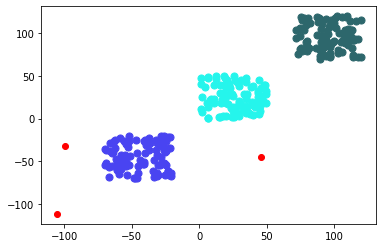

In [48]:
from random import randint


clusters, init_centers = kmeans(p, N_CL, InitMode.RANDOM, ret_init=True)


colors = ["#%02x%02x%02x" % (randint(0, 255), randint(0, 255), randint(0, 255)) for i in range(N_CL)]
for i in range(N_CL):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], 50, c=colors[i])
plt.scatter(init_centers[:, 0], init_centers[:, 1], c='red')

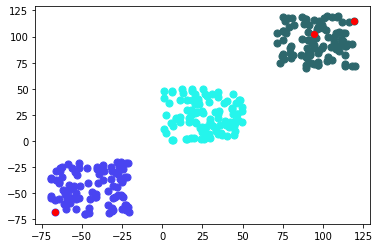

In [49]:
clusters, init_centers = kmeans(p, N_CL, InitMode.FURTHEST_FROM_ALL, ret_init=True)


for i in range(N_CL):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], 50, c=colors[i])

plt.scatter(init_centers[:, 0], init_centers[:, 1], c='red')

## 2. Равномерно распределенные точки


In [51]:
N_CL = 4  #  number of clusters
N_P = 1000  # number of points 
p = np.random.rand(N_P, 2) * 20 - 10

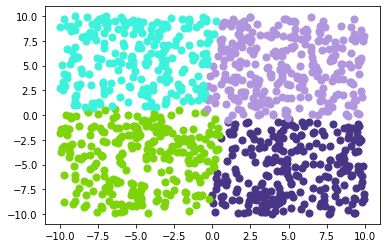

In [53]:

clusters = kmeans(p, N_CL, InitMode.RANDOM)


colors = ["#%02x%02x%02x" % (randint(0, 255), randint(0, 255), randint(0, 255)) for i in range(N_CL)]
for i in range(N_CL):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], 50, c=colors[i])
# plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.show()

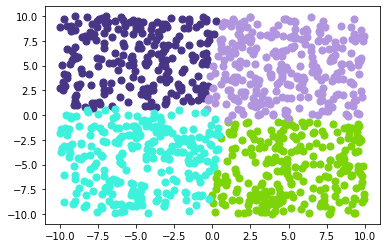

In [54]:
clusters = kmeans(p, N_CL, InitMode.FURTHEST_FROM_ALL)


for i in range(N_CL):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], 50, c=colors[i])

# plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.show()

## Нахождение числа кластеров


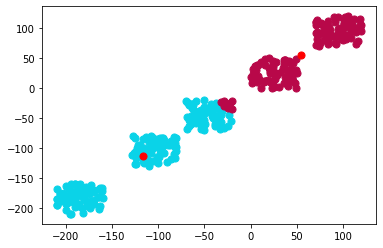

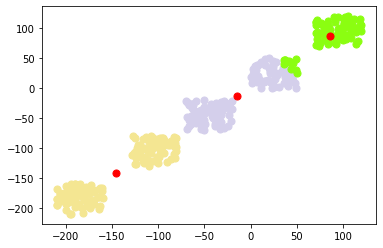

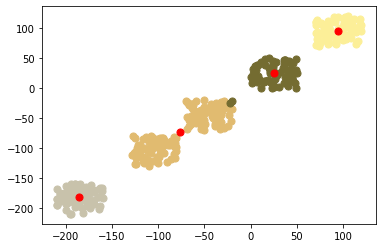

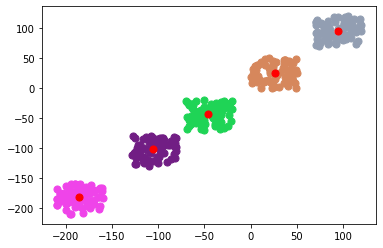

5


In [81]:
N_CL = 2  #  number of clusters
N_P = 300  # number of points 
DIST = 20  # distance between clusters
R = 25  # radius of a cluster (of a circle inside it)

p = np.random.rand(N_P // 4, 2) * 2 * R - (2 * R + DIST)
p = np.concatenate((p, np.random.rand(N_P // 4, 2) * 2 * R + (2 * R + DIST)), axis=0)
p = np.concatenate((p, np.random.rand(N_P // 4, 2) * 2 * R), axis=0)
p = np.concatenate((p, np.random.rand(N_P // 4, 2) * 2 * R - (2 * R + 4 * DIST)), axis=0)
p = np.concatenate((p, np.random.rand(N_P // 4, 2) * 2 * R - (2 * R + 8 * DIST)), axis=0)

clusters, centers = kmeans(p, N_CL, InitMode.RANDOM, ret_centers=True)

max_inner_dist = max([(np.max(np.sum((cl[:, np.newaxis] - cl)**2, axis=2))**0.5) for cl in clusters])  # maximum distance between two points in one cluster
cl_dist = np.sum((centers[:, np.newaxis] - centers)**2, axis=2)  #  distance**2 between every center
min_cl_dist = np.min(cl_dist[np.nonzero(cl_dist)])**0.5



colors = ["#%02x%02x%02x" % (randint(0, 255), randint(0, 255), randint(0, 255)) for i in range(N_CL)]
for i in range(N_CL):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], 50, c=colors[i])
plt.scatter(centers[:, 0], centers[:, 1], 50, c='red')
plt.show()

while max_inner_dist > min_cl_dist:
    N_CL += 1
    clusters, centers = kmeans(p, N_CL, InitMode.RANDOM, ret_centers=True) 
    max_inner_dist = max([np.max((np.sum((cl[:, np.newaxis] - cl)**2, axis=2)))**0.5 for cl in clusters])  # maximum distance between two points in one cluster
    cl_dist = np.sum((centers[:, np.newaxis] - centers)**2, axis=2)  #  distance**2 between every center
    min_cl_dist = np.min(cl_dist[np.nonzero(cl_dist)])**0.5
    colors = ["#%02x%02x%02x" % (randint(0, 255), randint(0, 255), randint(0, 255)) for i in range(N_CL)]
    for i in range(N_CL):
        plt.scatter(clusters[i][:, 0], clusters[i][:, 1], 50, c=colors[i])
    plt.scatter(centers[:, 0], centers[:, 1], 50, c='red')
    plt.show()


print(N_CL)
    
